In [4]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
def maior_lucro(lista_precos):
    if len(lista_precos) < 2:
        raise ValueError('Precisa ter ao menos 2 preços')
    
    menor_preco = lista_precos[0]
    maior_lucro = lista_precos[1] - lista_precos[0]
    
    for dia in range(1, len(lista_precos)):
        preco               = lista_precos[dia]
        tentativa_lucro     = preco - menor_preco
        maior_lucro         = max(maior_lucro, tentativa_lucro)
        menor_preco         = min(menor_preco, preco)
    
    return maior_lucro, menor_preco

In [22]:
FINANCEIRO  = ['B3SA3.SA', 'BIDI4.SA', 'BPAC11.SA', 'BPAN4.SA']
MATERIAIS   = ['CSNA3.SA', 'FESA3.SA', 'GGBR4.SA', 'SUZB3.SA', 'UNIP6.SA', 'USIM5.SA', 'VALE3.SA', 'PRIO3.SA', 'CSAN3.SA', 'KLBN11.SA', 'GOAU4.SA']
SMALL_CAPS  = ['STBP3.SA', 'TASA4.SA', 'PTBL3.SA', 'ROMI3.SA']
VAREJO      = ['MGLU3.SA', 'VVAR3.SA', 'AMAR3.SA']

In [35]:
setores = [FINANCEIRO, MATERIAIS, SMALL_CAPS, VAREJO]
print('ESCOLHA O SETOR PARA VISUALIZAR GRÁFICOS: ')
print('0) FINANCEIRO')
print('1) MATERIAIS')
print('2) SMALL_CAPS')
print('3) VAREJO')
i = int(input())
s = setores[i]

ESCOLHA O SETOR PARA VISUALIZAR GRÁFICOS: 
0) FINANCEIRO
1) MATERIAIS
2) SMALL_CAPS
3) VAREJO


 0


In [37]:
data   = yf.download(s, start='2019-12-01')['Adj Close'].dropna()

[*********************100%***********************]  4 of 4 completed


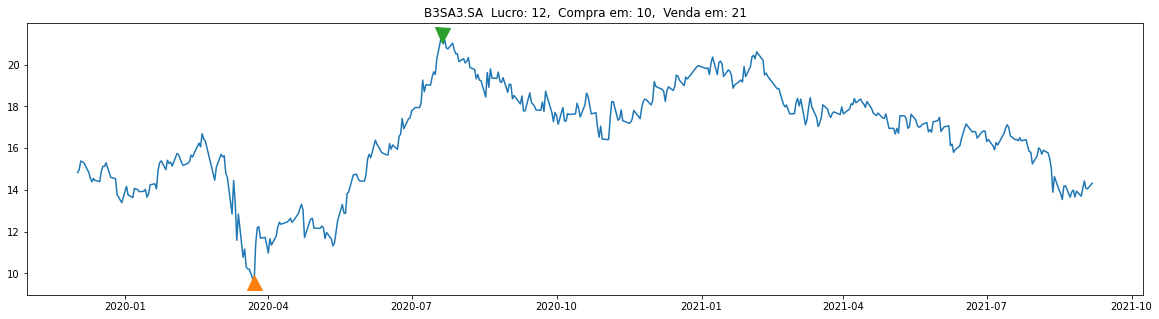

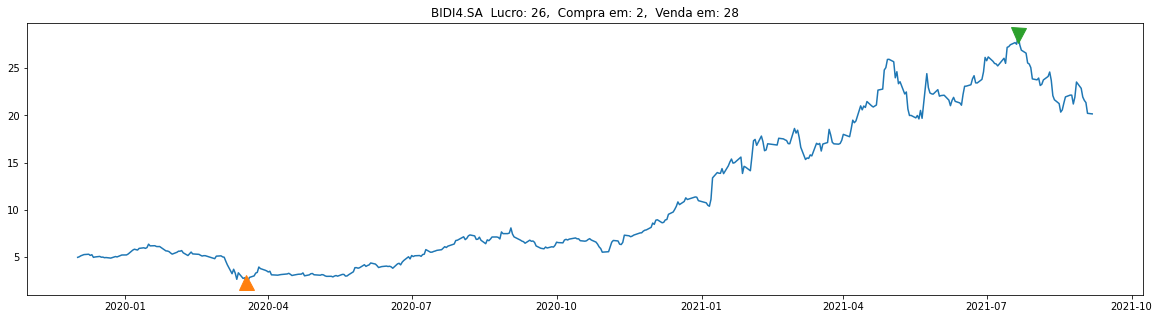

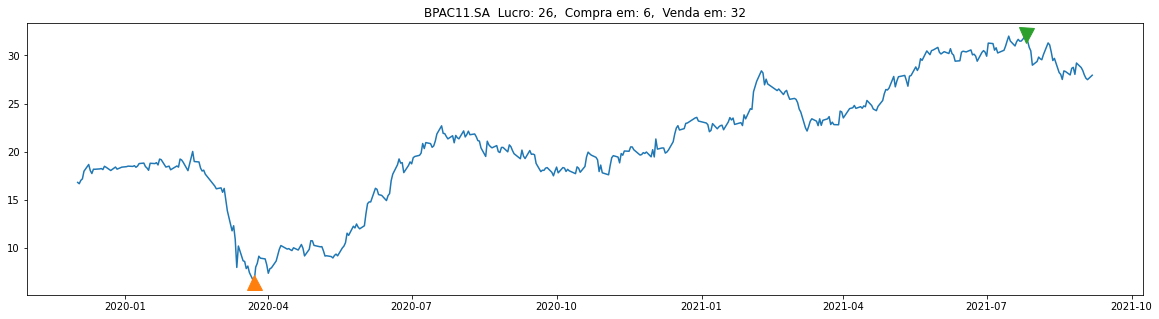

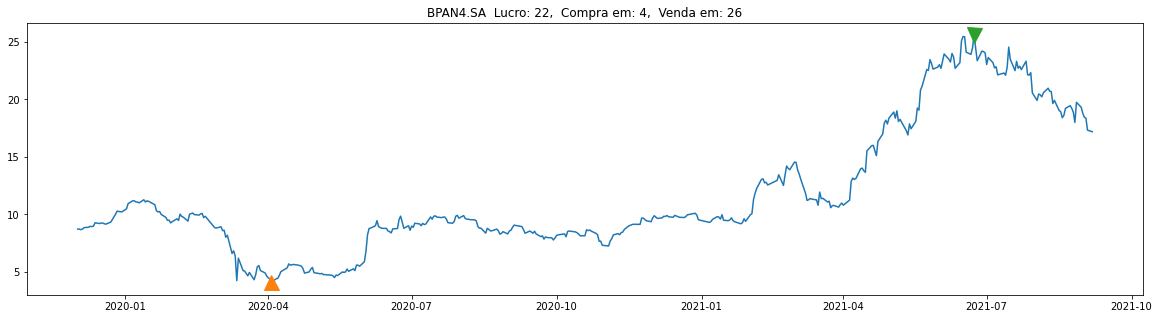

In [38]:
for acao in data.columns:
    lucro, menor = maior_lucro(data[acao])
    maior        = lucro + menor
    plt.figure(figsize=(20,5))
    plt.plot(data[acao])
    plt.plot(data[acao].sort_values().index[0], menor, "^", markersize=15)
    plt.plot(data[acao].sort_values().index[-1], maior, "v", markersize=15)
    plt.title(acao+'  '+'Lucro: '+str(round(lucro))+','+'  Compra em: '+str(round(menor))+','+'  Venda em: '+str(round(maior)))
    plt.show()